#Algoritmo de exemplo de treinamento ML


1.   Importar o .csv
2.   Importar Libs: Pandas, Numpy,
3.   Análise da Base de Dados
4.   Preparar a Base de Dados
5.   Converter dados textuais para numéricos
6.   Normalização da base de dados
7.   Treinamento de algoritmo de ML

Utilizaremos uma base de dados de rotatividade de clientes em uma empresa de telecomunicações.


###1 / 2 = import csv e libs

In [ ]:
import pandas as pd # "as pd" ou "as np" são "apelidos" para as libs
import numpy as np

In [ ]:
# Leitura da base de dados
dataframe = pd.read_csv('/content/telco.csv')

###3 - Analise da Base de Dados

In [ ]:
# Exibe as primeiras 5 linhas
dataframe.head()

,id_cliente,genero,idoso,casado,dependentes,meses_cliente,servico_de_telefone,varias_linhas,servico_de_internet,seguranca_online,...,protecao_de_dispositivo,suporte_tecnico,tv,streaming_de_filmes,contrato,fatura_sem_papel,forma_de_pagamento,cobrancas_mensais,custos_totais,cancelou
0,7590-VHVEG,feminino,nao,sim,nao,1,nao,nao,DSL,nao,...,nao,nao,nao,nao,mensal,sim,cheque eletronico,29.85,29.85,nao
1,5575-GNVDE,masculino,nao,nao,nao,34,sim,nao,DSL,sim,...,sim,nao,nao,nao,anual,nao,cheque,56.95,1889.50,nao
2,3668-QPYBK,masculino,nao,nao,nao,2,sim,nao,DSL,sim,...,nao,nao,nao,nao,mensal,sim,cheque,53.85,108.15,sim
3,7795-CFOCW,masculino,nao,nao,nao,45,nao,nao,DSL,sim,...,sim,sim,nao,nao,anual,nao,transferencia bancaria,42.30,1840.75,nao
4,9237-HQITU,feminino,nao,nao,nao,2,sim,nao,fibra optica,nao,...,nao,nao,nao,nao,mensal,sim,cheque eletronico,70.70,151.65,sim


In [ ]:
# Exibe quantidade de valores nulos por coluna
dataframe.isnull().sum()

id_cliente                 0
genero                     0
idoso                      0
casado                     0
dependentes                0
meses_cliente              0
servico_de_telefone        0
varias_linhas              0
servico_de_internet        0
seguranca_online           0
backup_online              0
protecao_de_dispositivo    0
suporte_tecnico            0
tv                         0
streaming_de_filmes        0
contrato                   0
fatura_sem_papel           0
forma_de_pagamento         0
cobrancas_mensais          0
custos_totais              0
cancelou                   0
dtype: int64

###4 - Preparar a base de dados

In [ ]:
# Apaga a coluna id_cliente
dataframe.drop('id_cliente', inplace=True, axis=1)

###5 - Converter dados textuais para numéricos

In [ ]:
# Seleciona as colunas do tipo "object"
colunas_object = dataframe.select_dtypes(include=['O']).columns.tolist()
colunas_object

['genero',
 'idoso',
 'casado',
 'dependentes',
 'servico_de_telefone',
 'varias_linhas',
 'servico_de_internet',
 'seguranca_online',
 'backup_online',
 'protecao_de_dispositivo',
 'suporte_tecnico',
 'tv',
 'streaming_de_filmes',
 'contrato',
 'fatura_sem_papel',
 'forma_de_pagamento',
 'cancelou']

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle #será usado no loop para armazenar os valores de cada coluna

# Chamando a função LabelEncoder e atribuição a uma variavel
le = LabelEncoder()

In [ ]:
for coluna in colunas_object:
  dataframe[coluna] = le.fit_transform(dataframe[coluna])
  with open(f'{coluna}.pkl', 'wb') as file:
    pickle.dump(le, file)

In [ ]:
dataframe.dtypes

genero                       int64
idoso                        int64
casado                       int64
dependentes                  int64
meses_cliente                int64
servico_de_telefone          int64
varias_linhas                int64
servico_de_internet          int64
seguranca_online             int64
backup_online                int64
protecao_de_dispositivo      int64
suporte_tecnico              int64
tv                           int64
streaming_de_filmes          int64
contrato                     int64
fatura_sem_papel             int64
forma_de_pagamento           int64
cobrancas_mensais          float64
custos_totais              float64
cancelou                     int64
dtype: object

###6 - Normalização da base de dados

In [ ]:
# DataFrame sem a ultima coluna
dataframe.drop('cancelou', axis=1)

,genero,idoso,casado,dependentes,meses_cliente,servico_de_telefone,varias_linhas,servico_de_internet,seguranca_online,backup_online,protecao_de_dispositivo,suporte_tecnico,tv,streaming_de_filmes,contrato,fatura_sem_papel,forma_de_pagamento,cobrancas_mensais,custos_totais
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,0,0,1,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,2,1,1,53.85,108.15
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,0,0,3,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,2,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,1,0,1,0,1,1,1,1,0,1,1,84.80,1990.50
7028,0,0,1,1,72,1,1,1,0,1,1,0,1,1,0,1,0,103.20,7362.90
7029,0,0,1,1,11,0,0,0,1,0,0,0,0,0,2,1,2,29.60,346.45
7030,1,1,1,0,4,1,1,1,0,0,0,0,0,0,2,1,1,74.40,306.60


In [ ]:
X = dataframe.drop('cancelou', axis=1)
X

,genero,idoso,casado,dependentes,meses_cliente,servico_de_telefone,varias_linhas,servico_de_internet,seguranca_online,backup_online,protecao_de_dispositivo,suporte_tecnico,tv,streaming_de_filmes,contrato,fatura_sem_papel,forma_de_pagamento,cobrancas_mensais,custos_totais
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,0,0,1,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,2,1,1,53.85,108.15
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,0,0,3,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,2,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,1,0,1,0,1,1,1,1,0,1,1,84.80,1990.50
7028,0,0,1,1,72,1,1,1,0,1,1,0,1,1,0,1,0,103.20,7362.90
7029,0,0,1,1,11,0,0,0,1,0,0,0,0,0,2,1,2,29.60,346.45
7030,1,1,1,0,4,1,1,1,0,0,0,0,0,0,2,1,1,74.40,306.60


In [ ]:
y = dataframe['cancelou'].values
y

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

# Normalizar os dados e salvar em uma matriz
X = scaler.transform(X)
X

array([[0.        , 0.        , 1.        , ..., 0.66666667, 0.11542289,
        0.0012751 ],
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.38507463,
        0.21586661],
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.35422886,
        0.01031041],
       ...,
       [0.        , 0.        , 1.        , ..., 0.66666667, 0.11293532,
        0.03780868],
       [1.        , 1.        , 1.        , ..., 0.33333333, 0.55870647,
        0.03321025],
       [1.        , 0.        , 0.        , ..., 1.        , 0.86965174,
        0.78764136]])

In [ ]:
X.shape

(7032, 19)

###7 - Treinamento de algoritmo de ML


In [ ]:
# Importamos a biblioteca necessária para dividir a base de dados
from sklearn.model_selection import train_test_split

# Separamos X e y em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')

print(f'Y train shape: {y_train.shape}')
print(f'Y test shape: {y_test.shape}')

X train shape: (5274, 19)
X test shape: (1758, 19)
Y train shape: (5274,)
Y test shape: (1758,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cria instancia de algoritmo de regressão logistica
lrmodel = LogisticRegression()

#treina o modelo com a base de treinamento
lrmodel_treinado = lrmodel.fit(X_train, y_train)

In [ ]:
# realiza a predição dos valores de teste
y_predict = lrmodel_treinado.predict(X_test)

# retorna a acuracia de acerto na base de dados
accuracy_score(y_test, y_predict)

0.8071672354948806

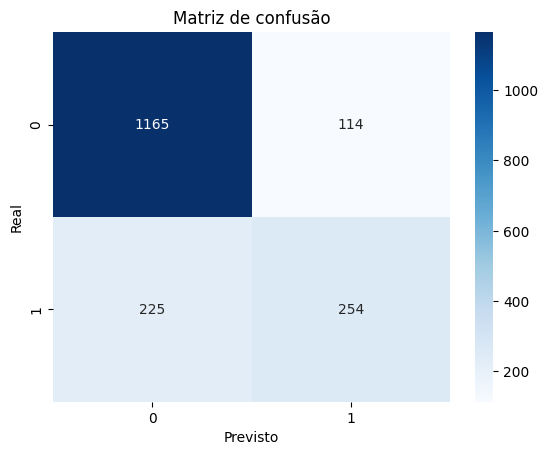

In [ ]:
from sklearn.metrics import  confusion_matrix

# Bibliotecas para gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Cálculo da matriz de confusão
confusion = confusion_matrix(y_test, y_predict)


# Cria o heatmap da matriz de confusão
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')

# Configurações adicionais
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')

# Exibe o gráfico
plt.show()